In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 

In [2]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import warnings 

In [3]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
diabetes_df = pd.DataFrame(data)

In [5]:
diabetes_df.describe(include = 'all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes_df.shape

(768, 9)

In [8]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

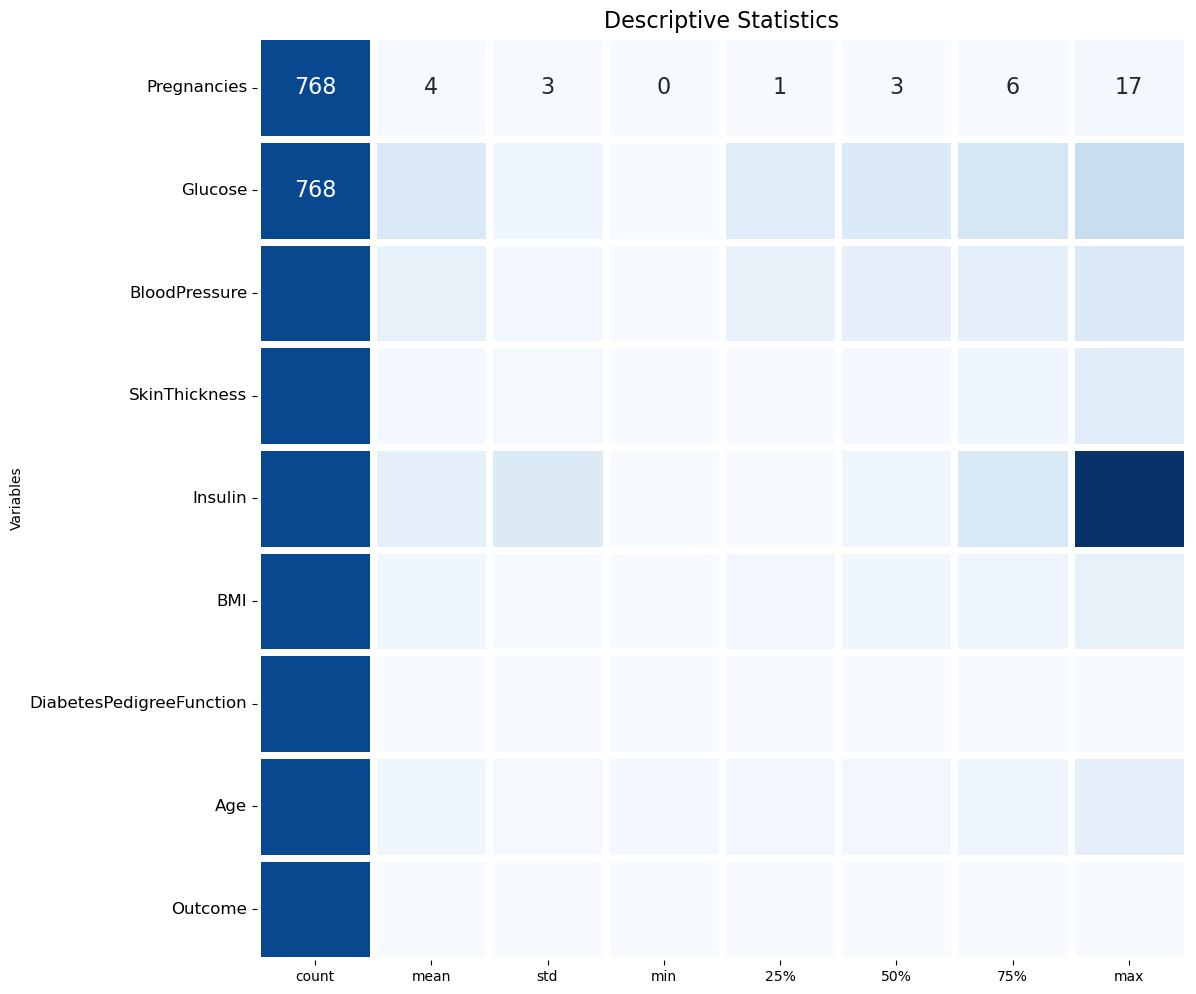

In [10]:
desc = diabetes_df.describe().T
diabetes_df2 = pd.DataFrame(index = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'],
                            columns = ['count','mean','std','min','25%','50%','75%','max'], data = desc)
f, ax = plt.subplots(figsize = (12,12))
sns.heatmap(diabetes_df2, annot = True , cmap = 'Blues', fmt='.0f',ax=ax, linewidths = 5, cbar = False, annot_kws= {'size':16})
plt.xticks(size = 10)
plt.yticks(size = 12, rotation =0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size = 16)
plt.show()

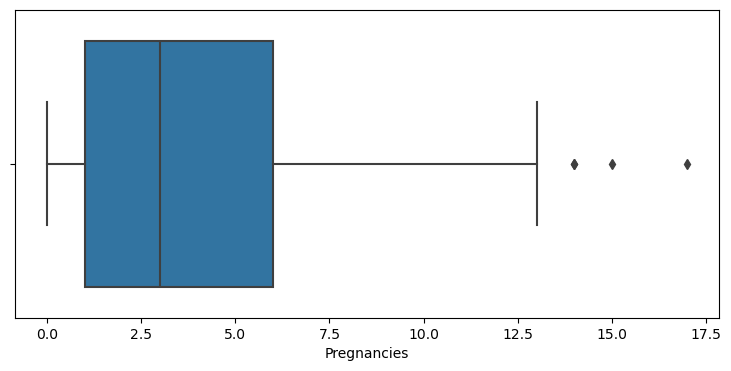

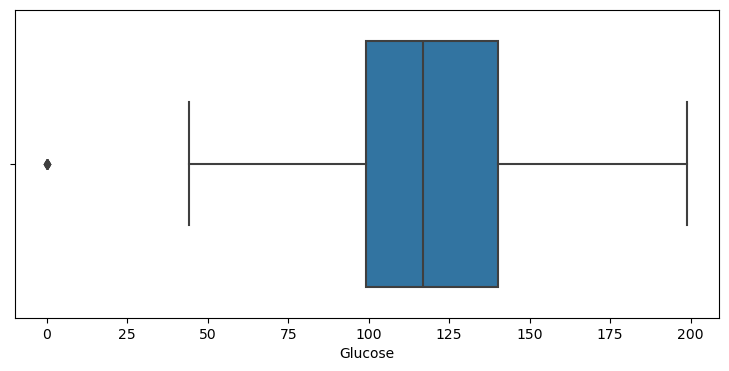

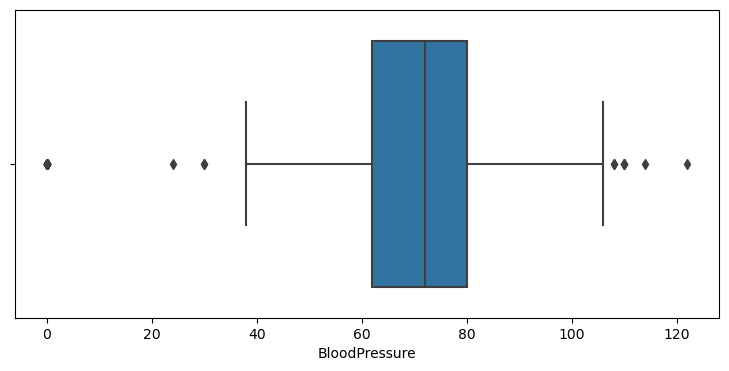

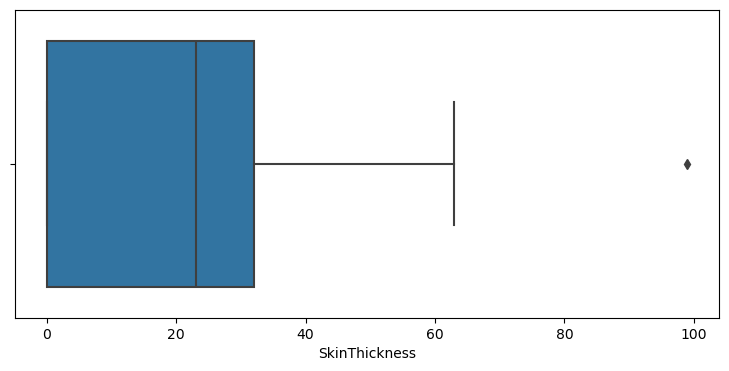

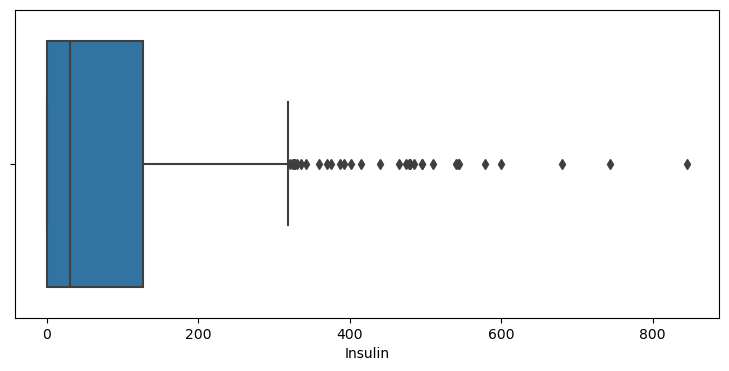

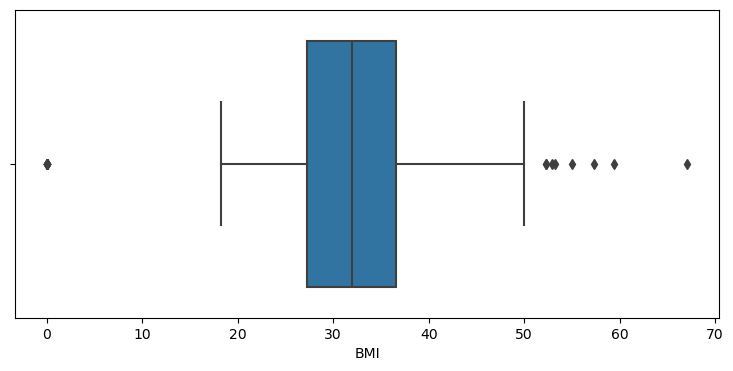

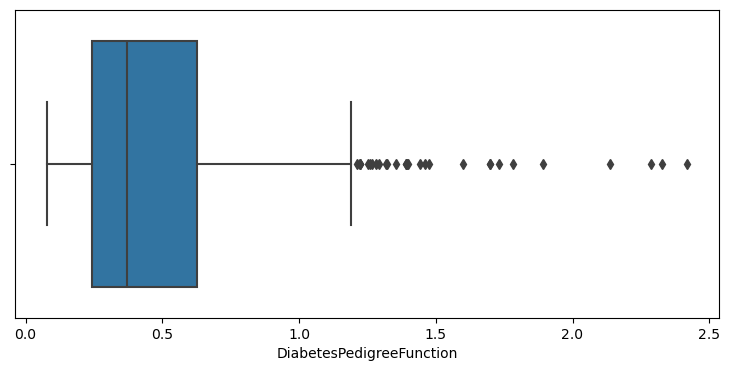

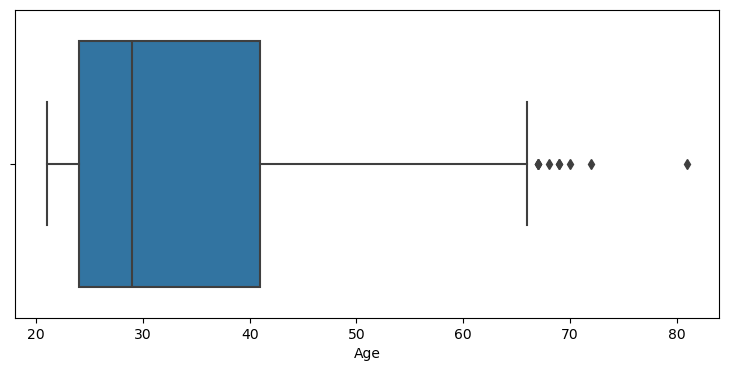

In [11]:
Numerical = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
i =0 
while i<8:
  fig = plt.figure(figsize = [20,4])
  plt.subplot(1,2,1)
  sns.boxplot(x = Numerical[i], data = diabetes_df)
  i += 1
  if i==8:
    break
    plt.subplot(1,2,2)
    sns.boxplot(x = Numerical[i], data = diabetes_df)
    i += 1
    plt.show()

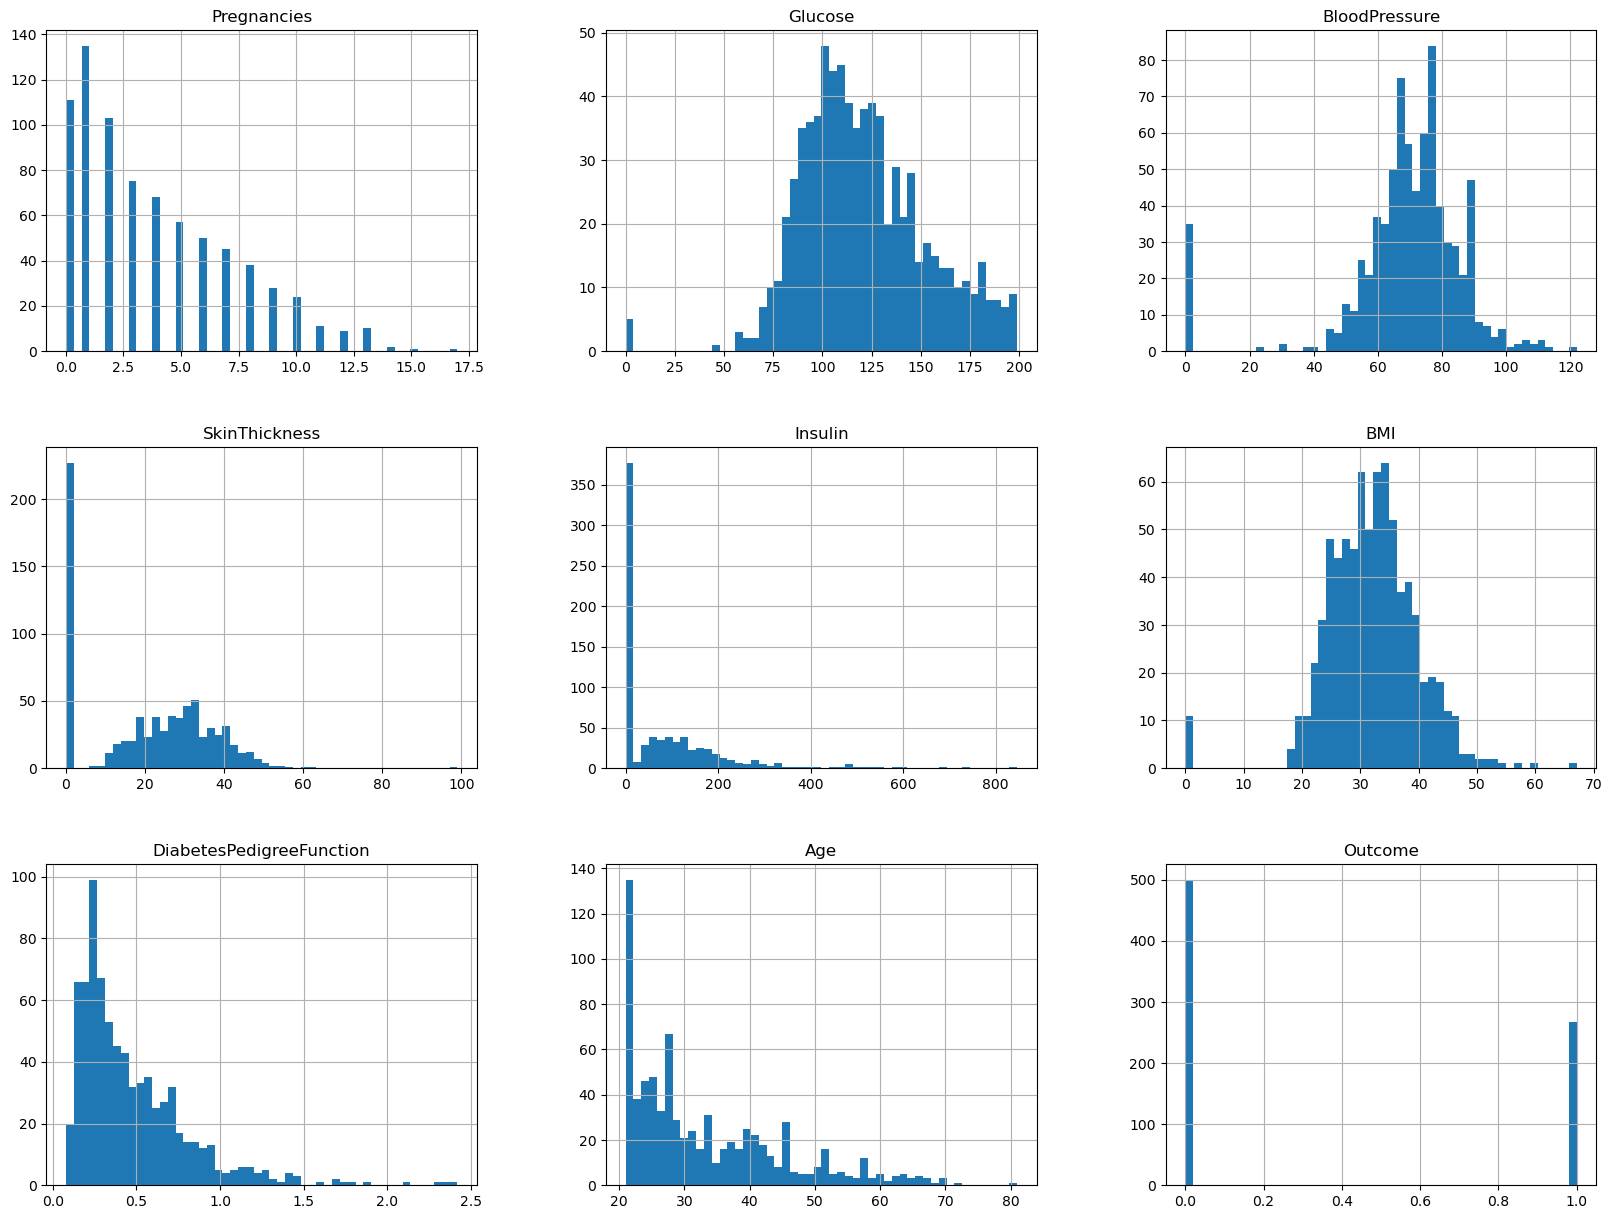

In [12]:
diabetes_df.hist(bins = 50, figsize =(20,15))
plt.show()

In [13]:
diabetes_df3 = diabetes_df.copy()

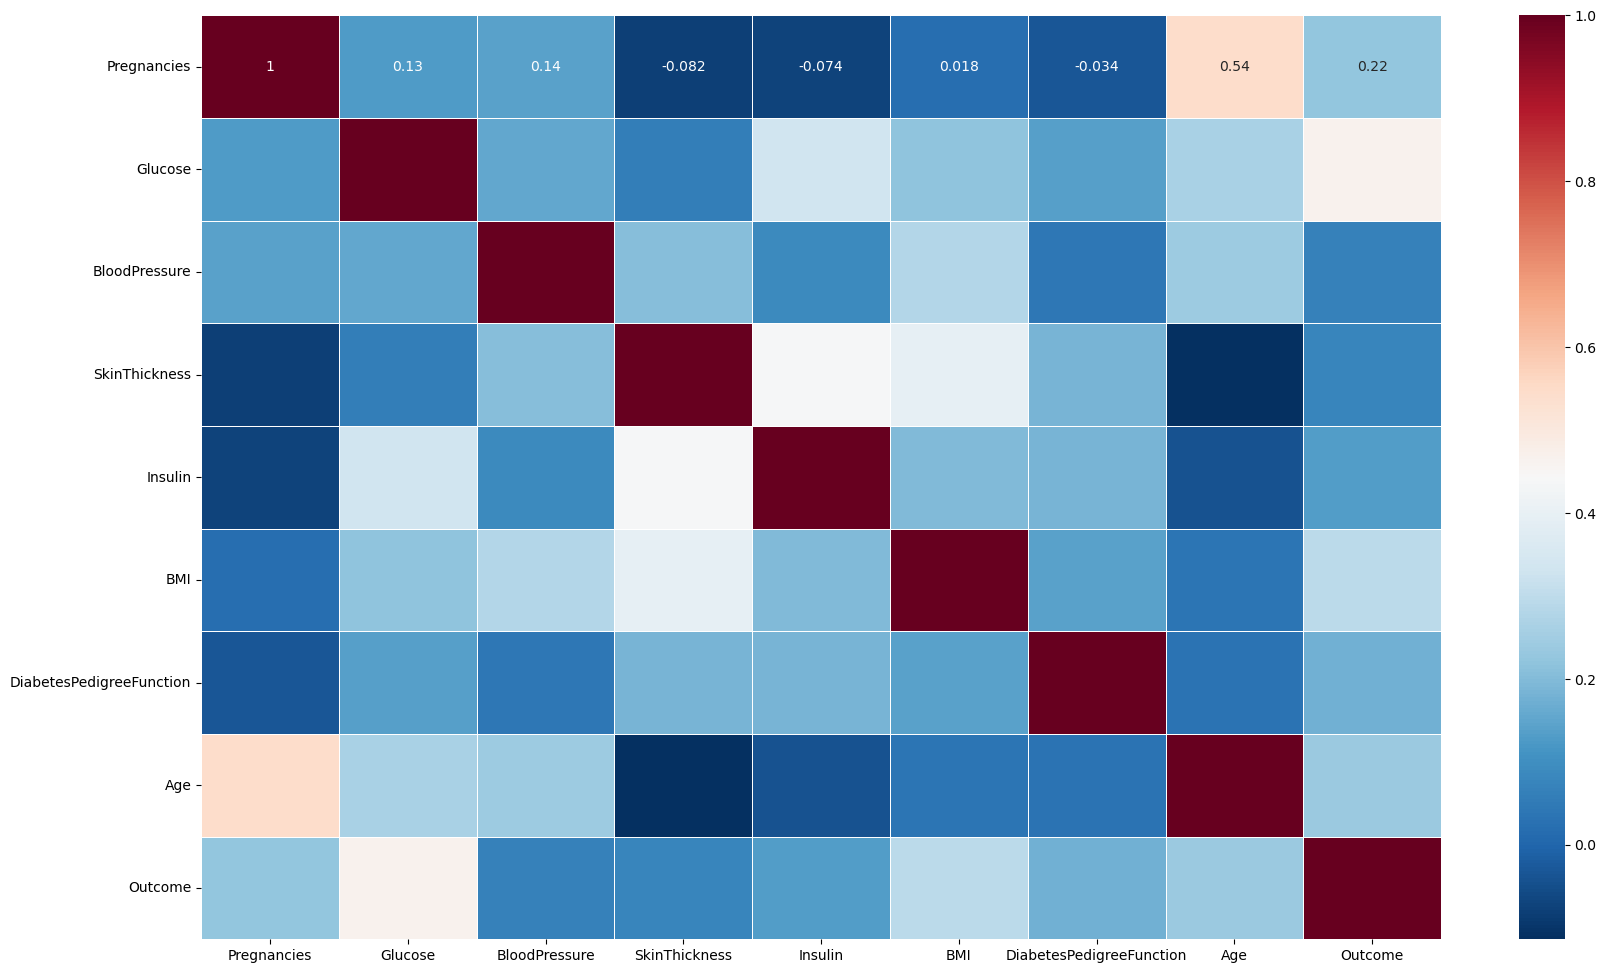

In [14]:
fig, ax= plt.subplots(figsize = (20,12))
ax = sns.heatmap(diabetes_df3.corr(),cmap = 'RdBu_r',cbar = True, annot = True,linewidths = 0.5, ax=ax)
plt.show()

In [15]:
diabetes_df3.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [16]:
diabetes_df3.corr()['Outcome'].sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

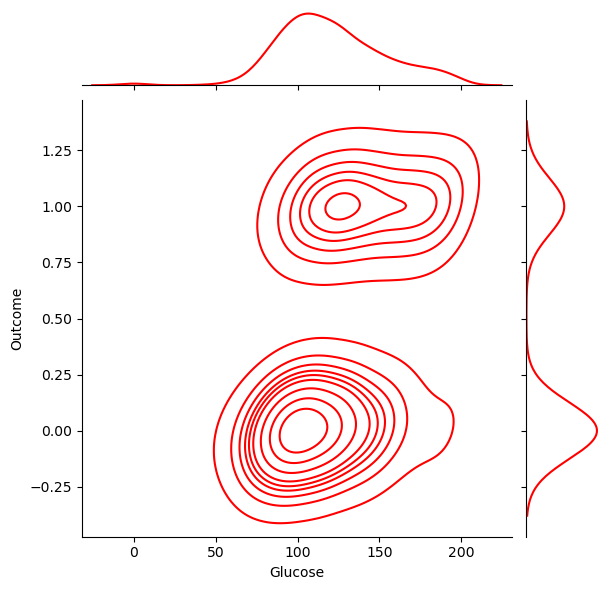

In [17]:
sns.jointplot(x = 'Glucose', y = 'Outcome',data = diabetes_df,color = 'red',kind = 'kde')

In [18]:
x = pd.DataFrame(diabetes_df3,columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']).values
y= diabetes_df3.Outcome.values.reshape(-1,1)
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [20]:
K = 3
CLF = KNeighborsClassifier(K)
CLF.fit(x_train,y_train.ravel())
y_pred = CLF.predict(x_test)

In [21]:
K = 20
Acc = np.zeros((K))
for i in range(1, K+1):
  CLF = KNeighborsClassifier(n_neighbors = i)
  CLF.fit(x_train,y_train.ravel())
  y_pred = CLF.predict(x_test)
  Acc[i-1] = metrics.accuracy_score(y_test,y_pred)
Acc

array([0.61471861, 0.71428571, 0.69264069, 0.73593074, 0.74891775,
       0.74025974, 0.74891775, 0.74891775, 0.74891775, 0.75324675,
       0.75324675, 0.75324675, 0.74891775, 0.74891775, 0.75757576,
       0.74458874, 0.74458874, 0.73593074, 0.72727273, 0.72727273])

In [22]:
print(np.max(Acc))
print(np.min(Acc))

0.7575757575757576
0.6147186147186147


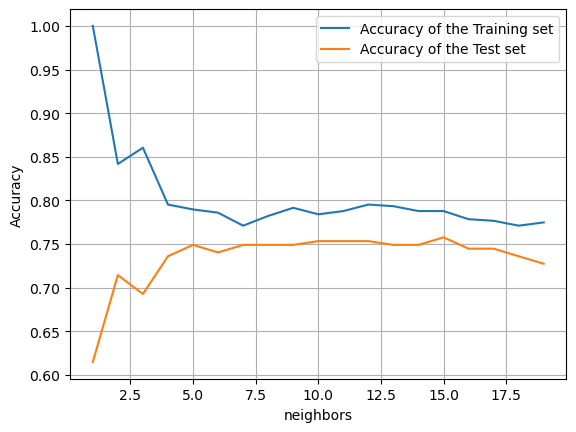

In [23]:
training_acc = []
test_acc = []
neighbors_setting = range(1,20)
for n_neighbors in neighbors_setting:
  knn = KNeighborsClassifier(n_neighbors = n_neighbors)
  knn.fit(x_train,y_train.ravel())
  training_acc.append(knn.score(x_train,y_train))
  test_acc.append(knn.score(x_test,y_test))

plt.plot(neighbors_setting,training_acc,label = "Accuracy of the Training set")
plt.plot(neighbors_setting,test_acc,label = "Accuracy of the Test set")

plt.ylabel("Accuracy")
plt.xlabel("neighbors")
plt.grid()
plt.legend()

In [24]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1,20)}
grid_kn = GridSearchCV(estimator = knn, param_grid= parameters, scoring = "accuracy",
                       cv = 5, verbose = 1, n_jobs = -1)
grid_kn.fit(x_train,y_train.ravel())

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=19), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 20)}, scoring='accuracy',
             verbose=1)

In [25]:
CLF.score(x,y)

0.7565104166666666

In [26]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.7272727272727273


In [27]:
confusion_matrix(y,CLF.predict(x))

array([[450,  50],
       [137, 131]], dtype=int64)

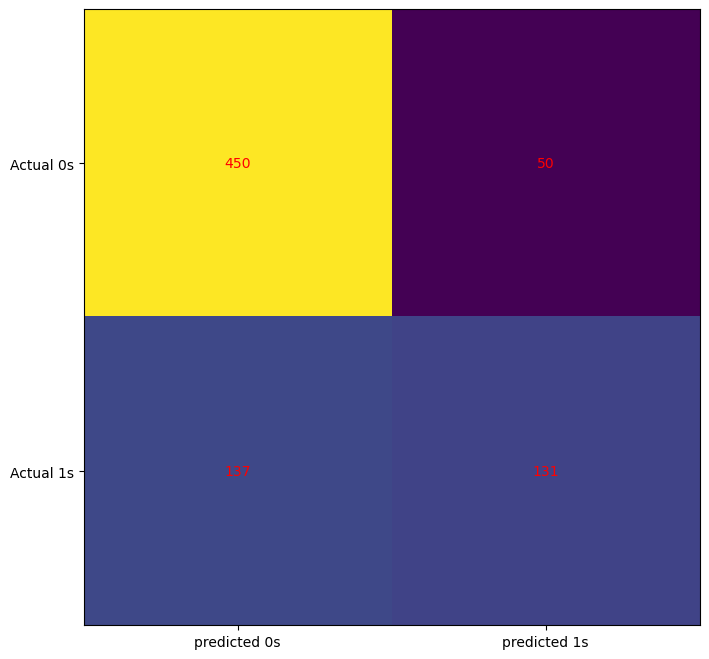

In [28]:
cm = confusion_matrix(y,CLF.predict(x))
fig, ax = plt.subplots(figsize = (8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (0,1), ticklabels = ("predicted 0s","predicted 1s"))
ax.yaxis.set(ticks = (0,1), ticklabels = ("Actual 0s","Actual 1s"))
ax.set_ylim(1.5,-0.5)
for i in range (2):
  for j in range (2):
    ax.text(j,i, cm[i,j], ha = "center", va= "center", color = "red")

plt.show()